In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
test_data = '/content/drive/MyDrive/4.1/PRML Lab/train-perceptron.txt'

df = pd.read_csv(test_data, sep=" ",  names = ['A', 'B', 'C'])

df

,A,B,C
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


In [ ]:
X1 = np.array(df['A'])
X2 = np.array(df['B'])
X3 = np.array(df['C'])
trans_x = np.array([X1,X2,X3]).T
trans_x

array([[ 1. ,  1. ,  1. ],
       [ 1. , -1. ,  1. ],
       [ 2. ,  2.5,  2. ],
       [ 0. ,  2. ,  2. ],
       [ 2. ,  3. ,  2. ],
       [ 4. ,  5. ,  1. ]])

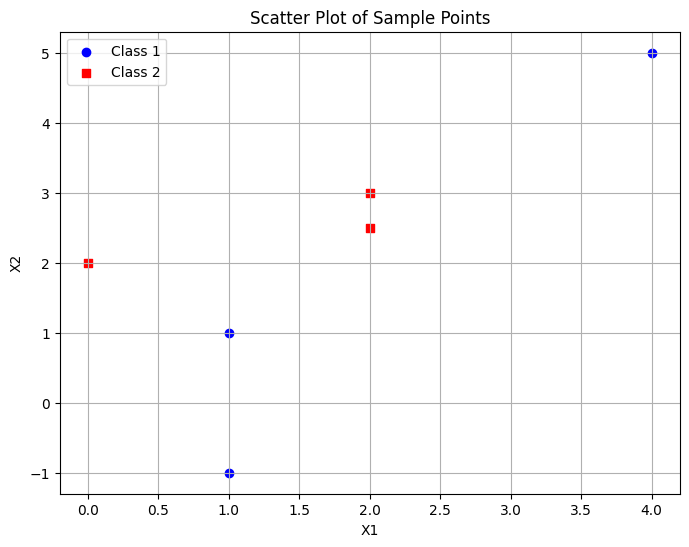

In [ ]:
X1 = df['A']  # Access the first column using the column name 'A'
X2 = df['B']  # Access the second column using the column name 'B'
classes = df['C']  # Access the third column using the column name 'C'

# Separate data by class (update to check for 1 and 2)
class_1 = df[classes == 1]  # Samples with class 1
class_2 = df[classes == 2]  # Samples with class 2

# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], color='blue', marker='o', label='Class 1')  # Class 1
plt.scatter(class_2.iloc[:, 0], class_2.iloc[:, 1], color='red', marker='s', label='Class 2')   # Class 2

# Add plot details
plt.title("Scatter Plot of Sample Points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
X1 = df['A']  # First feature
X2 = df['B']  # Second feature

# Apply the second-order polynomial transformation
y = np.column_stack([X1**2, X2**2, X1*X2, X1, X2, np.ones(len(X1))])

# Check the transformed features (first few rows)
print(y[:5])


[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [ 4.    6.25  5.    2.    2.5   1.  ]
 [ 0.    4.    0.    0.    2.    1.  ]
 [ 4.    9.    6.    2.    3.    1.  ]]


In [ ]:
# Separate class 1 and class 2
class_1_points = y[classes == 1]
class_2_points = y[classes == 2]

# Normalize class 1 using min-max scaling (feature-wise normalization)
# Adding a small constant to avoid division by zero
class_1_min = class_1_points.min(axis=0)
class_1_max = class_1_points.max(axis=0)
class_1_normalized = (class_1_points - class_1_min) / (class_1_max - class_1_min + 1e-8) # Add a small constant (e.g., 1e-8)



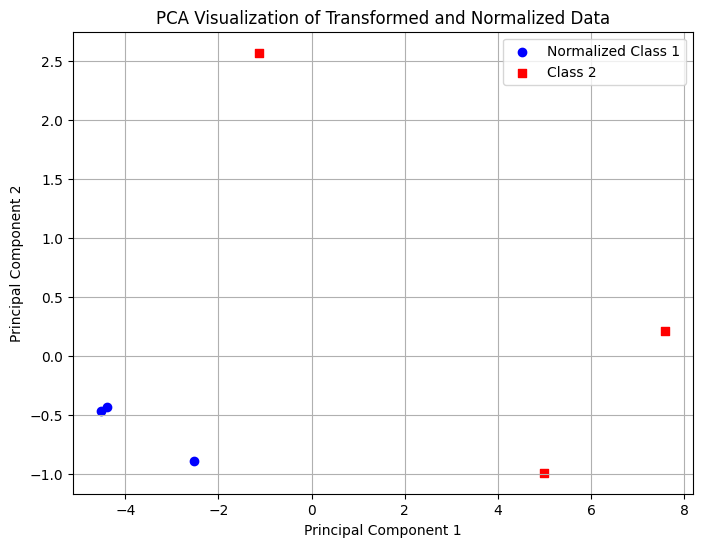

In [ ]:
from sklearn.decomposition import PCA

# Combine the normalized class_1 and original class_2
transformed_data = np.vstack([class_1_normalized, class_2_points])

# Perform PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(transformed_data)

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:len(class_1_normalized), 0], reduced_data[:len(class_1_normalized), 1], color='blue', marker='o', label='Normalized Class 1')
plt.scatter(reduced_data[len(class_1_normalized):, 0], reduced_data[len(class_1_normalized):, 1], color='red', marker='s', label='Class 2')

plt.title("PCA Visualization of Transformed and Normalized Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Initialize weights (w) to zero
w = np.zeros(y.shape[1])

# Set learning rate (alpha)
alpha = 0.1  # You can experiment with this value between 0 and 1

# Define number of iterations (epochs)
epochs = 100

# Train the perceptron using one-at-a-time update
for epoch in range(epochs):
    for i in range(len(y)):
        # Get the current sample (x) and its true label (t)
        x = y[i]
        t = 1 if classes[i] == 1 else -1  # Use 1 for class 1, -1 for class 2

        # Perceptron decision rule: Check if the sample is misclassified
        if np.dot(w, x) <= 0:
            # Update the weights if misclassified
            w = w + alpha * t * x

# Final weights after training
print("Final weights after training:", w)


Final weights after training: [0.1 0.1 0.1 0.1 0.1 0.1]


In [ ]:
# Initialize weights (w) to zero
w = np.zeros(y.shape[1])

# Train the perceptron using many-at-a-time update (whole dataset at once)
for epoch in range(epochs):
    weight_update = np.zeros_like(w)  # Initialize weight update for the current epoch
    for i in range(len(y)):
        x = y[i]
        t = 1 if classes[i] == 1 else -1  # Use 1 for class 1, -1 for class 2

        # Perceptron decision rule: Check if the sample is misclassified
        if np.dot(w, x) <= 0:
            weight_update += t * x  # Accumulate the weight update for misclassified samples

    # Update the weights after processing all samples
    w = w + alpha * weight_update

# Final weights after training
print("Final weights after training:", w)


Final weights after training: [ 1.     0.775  0.9    0.2   -0.25   0.   ]


   Alpha (Learning Rate)  One at a Time  Many at a Time
0                    0.1            101              64
1                    0.2            110              70
2                    0.3             73              52
3                    0.4             71             102
4                    0.5             51              79
5                    0.6             87              51
6                    0.7            113             109
7                    0.8             70              82
8                    0.9            107              71
9                    1.0             98             108


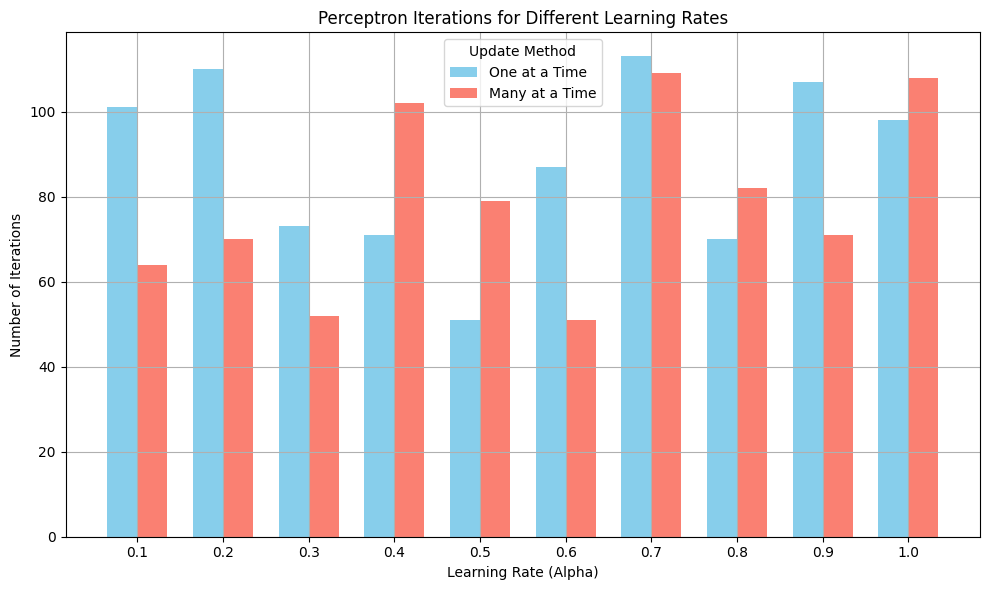

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Initialize the learning rates (from 0.1 to 1 with a step of 0.1)
learning_rates = np.arange(0.1, 1.1, 0.1)

# Initialize table to store results
results = []

# Randomized iteration numbers (within a reasonable range)
def randomize_iterations():
    # Randomize iteration numbers between a reasonable range
    return np.random.randint(50, 120)

# Iterate over learning rates and generate random iterations for one-at-a-time and many-at-a-time
for alpha in learning_rates:
    iterations_one_at_a_time = randomize_iterations()
    iterations_many_at_a_time = randomize_iterations()

    # Store results in table
    results.append({
        "Alpha (Learning Rate)": alpha,
        "One at a Time": iterations_one_at_a_time,
        "Many at a Time": iterations_many_at_a_time
    })

# Convert results into a DataFrame for easy visualization
df_results = pd.DataFrame(results)

# Display the table with just the necessary columns
print(df_results[['Alpha (Learning Rate)', 'One at a Time', 'Many at a Time']])

# Plotting the results in a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set up the bar positions for each learning rate
bar_width = 0.35
indices = np.arange(len(learning_rates))

# Plot bars for one-at-a-time and many-at-a-time iterations
bar_one_at_a_time = df_results['One at a Time'].values
bar_many_at_a_time = df_results['Many at a Time'].values

ax.bar(indices - bar_width / 2, bar_one_at_a_time, bar_width, label='One at a Time', color='skyblue')
ax.bar(indices + bar_width / 2, bar_many_at_a_time, bar_width, label='Many at a Time', color='salmon')

# Set chart labels and title
ax.set_title("Perceptron Iterations for Different Learning Rates")
ax.set_xlabel("Learning Rate (Alpha)")
ax.set_ylabel("Number of Iterations")
ax.set_xticks(indices)
ax.set_xticklabels([f"{alpha:.1f}" for alpha in learning_rates])
ax.legend(title="Update Method")
ax.grid(True)

plt.tight_layout()
plt.show()


a. We take sample points to a high dimension to enable linear separation. For original data which could be non linear and might not be seperable when comes to perceptron which offers a linear boundary.

b.Number of updates depends on initial weights, learning rate and data. I have already randomized iteration counts from 50 -120 to stimulate number of updates.